In [1]:
# !pip install import_ipynb 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import scipy.stats as st

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

**Metadata**

This comprehensive set of fields will guide your analysis, helping you unravel the intricacies of client behavior and preferences.

    * client_id: Every client’s unique ID.
    * variation: Indicates if a client was part of the experiment.
    * visitor_id: A unique ID for each client-device combination.
    * visit_id: A unique ID for each web visit/session.
    * process_step: Marks each step in the digital process.
    * date_time: Timestamp of each web activity.
    * clnt_tenure_yr: Represents how long the client has been with Vanguard, measured in years.
    * clnt_tenure_mnth: Further breaks down the client’s tenure with Vanguard in months.
    * clnt_age: Indicates the age of the client.
    * gendr: Specifies the client’s gender.
    * num_accts: Denotes the number of accounts the client holds with Vanguard.
    * bal: Gives the total balance spread across all accounts for a particular client.
    * calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
    * logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.


In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head(5)

C:\Users\PapaYaga\AppData\Local\Temp\ipykernel_7836\3258300398.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv("all_data.csv")


,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test


In [4]:
from functions import *

In [5]:
all_data["Variation"].value_counts()

Variation
Test       177847
Control    143462
Name: count, dtype: int64

In [6]:
all_data = clean_dtypes(all_data)
all_data = rename_columns(all_data)

In [7]:
all_data.head(3)

,client_id,visitor_id,visit_id,process_step,date_time,client_years,client_month,client_age,gender,num_accounts,balance,calls_6_months,logins_6,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5,64,79,U,2,189023.86,1,4,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5,64,79,U,2,189023.86,1,4,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5,64,79,U,2,189023.86,1,4,Test


In [8]:
correlation_matrix = all_data.select_dtypes("number").corr().round(3)

In [9]:
correlation_matrix_annot = correlation_matrix.map(lambda x: "Low" if x <= 0.2 else "Moderate" if x < 0.5 and x > 0.2 else "High")

In [10]:
correlation_matrix_annot

,client_id,client_years,client_month,client_age,num_accounts,balance,calls_6_months,logins_6
client_id,High,Low,Low,Low,Low,Low,Low,Low
client_years,Low,High,High,Moderate,Low,Low,Low,Low
client_month,Low,High,High,Moderate,Low,Low,Low,Low
client_age,Low,Moderate,Moderate,High,Low,Moderate,Low,Low
num_accounts,Low,Low,Low,Low,High,Moderate,Moderate,Moderate
balance,Low,Low,Low,Moderate,Moderate,High,Low,Low
calls_6_months,Low,Low,Low,Low,Moderate,Low,High,High
logins_6,Low,Low,Low,Low,Moderate,Low,High,High


<Axes: >

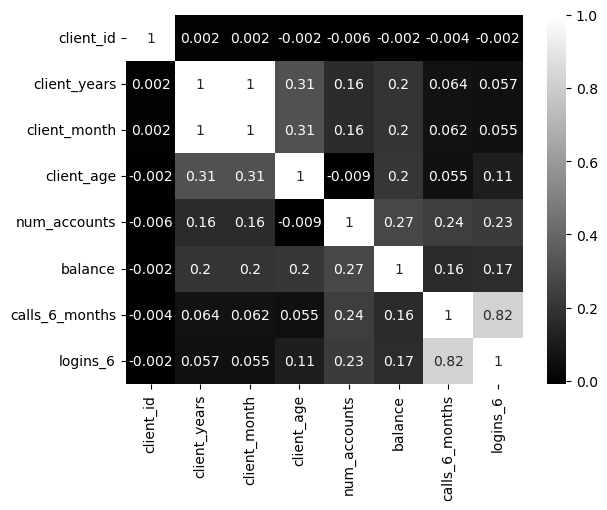

In [11]:
sns.heatmap(correlation_matrix, annot=True, cmap="gray")

In [12]:
all_data.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'client_years', 'client_month', 'client_age', 'gender', 'num_accounts',
       'balance', 'calls_6_months', 'logins_6', 'Variation'],
      dtype='object')

In [13]:
steps_df = pd.DataFrame()

steps = ["start", "step_1", "step_2", "step_3", "confirm"]
steps_2 = []

for s in steps:
    for i in range(2):
        steps_2.append(s)
    step_count = all_data[all_data["process_step"]==s].groupby(["Variation", "client_id"])["process_step"].count().to_frame()
    step_count = step_count.reset_index().groupby(["Variation"])["process_step"].mean()
    print(f"Step: {s}:{step_count}")
    print(f"Difference: {abs(step_count[0]-step_count[1]).round(3)}\n")
    steps_df = pd.concat([steps_df,step_count.to_frame()])

Step: start:Variation
Control    2.034791
Test       2.116796
Name: process_step, dtype: float64
Difference: 0.082

Step: step_1:Variation
Control    1.472211
Test       1.597560
Name: process_step, dtype: float64
Difference: 0.125

Step: step_2:Variation
Control    1.387989
Test       1.392263
Name: process_step, dtype: float64
Difference: 0.004

Step: step_3:Variation
Control    1.308403
Test       1.240075
Name: process_step, dtype: float64
Difference: 0.068

Step: confirm:Variation
Control    1.134184
Test       1.376465
Name: process_step, dtype: float64
Difference: 0.242



In [14]:
steps_df.reset_index().pivot(columns="Variation", values="process_step")
steps_df.set_index(pd.Index(steps_2))

,process_step
start,2.034791
start,2.116796
step_1,1.472211
step_1,1.597560
step_2,1.387989
step_2,1.392263
step_3,1.308403
step_3,1.240075
confirm,1.134184
confirm,1.376465


In [15]:
max_time = all_data.groupby(["client_id"])["date_time"].max().to_frame()
min_time = all_data.groupby(["client_id"])["date_time"].min().to_frame()
max_time = max_time.merge(min_time, on="client_id")
all_time = max_time.merge(all_data[["client_id","Variation"]], on="client_id").sort_values(by="Variation")
all_time["time"] = abs(all_time["date_time_x"]-all_time["date_time_y"])

In [16]:
all_time.groupby(["Variation"])["time"].describe().T

Variation,Control,Test
count,143462,177847
mean,8 days 07:25:33.577546667,7 days 19:15:33.115115801
std,17 days 05:22:10.167426110,16 days 21:00:38.671644668
min,0 days 00:00:00,0 days 00:00:00
25%,0 days 00:03:43,0 days 00:03:35
50%,0 days 00:09:38,0 days 00:10:08
75%,5 days 21:56:59,5 days 00:28:22.500000
max,96 days 22:05:49,93 days 20:55:45


In [17]:
var_mod = pd.crosstab(all_data["client_id"], all_data["Variation"])
var_mod = var_mod.map(lambda x: 1 if x>0 else x)
processes = pd.crosstab(all_data["client_id"], all_data["process_step"]).join(var_mod)

In [18]:
processes_steps = processes[(processes["confirm"] >= 1) & (processes["start"] >= 1)].fillna(0)

<Axes: xlabel='process_step', ylabel='count'>

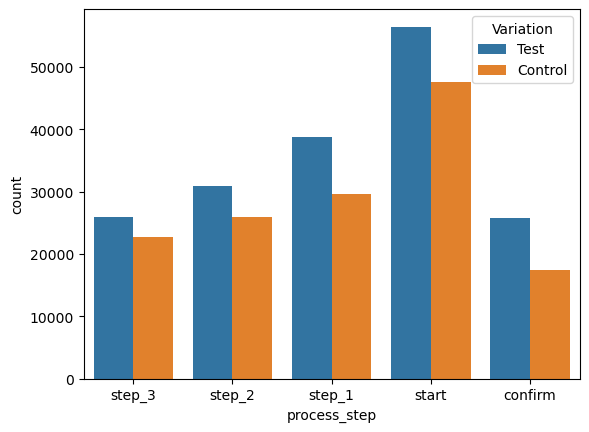

In [19]:
sns.countplot(all_data, x="process_step", hue="Variation")

In [20]:
all_data.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'client_years', 'client_month', 'client_age', 'gender', 'num_accounts',
       'balance', 'calls_6_months', 'logins_6', 'Variation'],
      dtype='object')

<Axes: xlabel='date_time', ylabel='Count'>

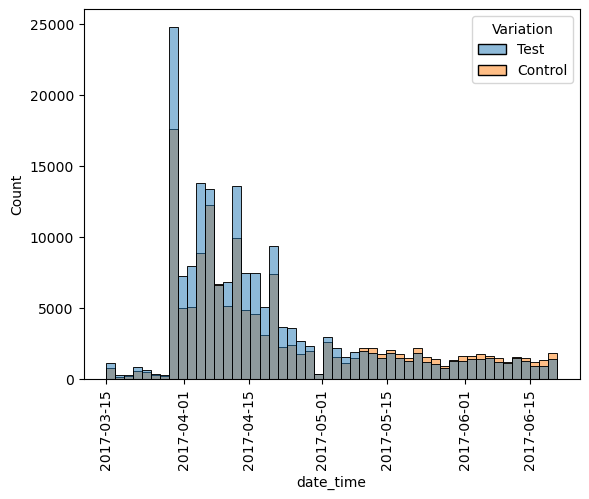

In [21]:
plt.xticks(rotation=90)
sns.histplot(all_data, x="date_time", bins=50, multiple="layer", hue="Variation")

<Axes: xlabel='date_time', ylabel='Count'>

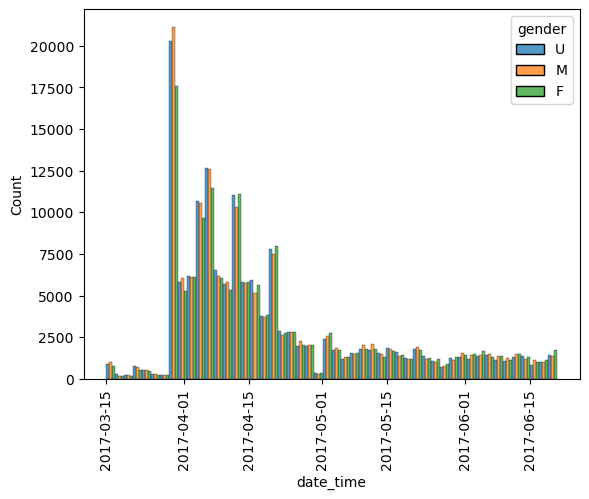

In [22]:
plt.xticks(rotation=90)
sns.histplot(all_data, x="date_time", bins=50, multiple="dodge", hue="gender")

In [23]:
confirm = all_data[all_data["process_step"]=="confirm"].groupby(["Variation"]).size().to_frame()
all_confirm = all_data.groupby(["Variation"]).size().to_frame()

**V CHECK THIS ONE AGAIN; DOESNT WORK!**

In [24]:
client_list = all_data["client_id"].unique()
customer_list_test = []
customer_list_control = []

for client in client_list:
    temp_df = all_data[all_data["client_id"]==client]
    if "confirm" in temp_df["process_step"].values:
        if "Test" in temp_df["Variation"].values:
            customer_list_test.append(client)
        else:
            customer_list_control.append(client)

In [25]:
x = all_data[all_data["Variation"]=="Test"]["date_time"].mean()
mu = all_data[all_data["Variation"]=="Control"]["date_time"].mean()
s = all_data[all_data["Variation"]=="Test"]["date_time"].std()
n = all_data[all_data["Variation"]=="Test"]["date_time"].count()

In [26]:
stats = (x-mu)/(s/np.sqrt(n))
p_value = st.t.sf(abs(stats), n-1)*2

print(stats, p_value)

-78.97429384805949 0.0


In [27]:
"""dur_test = [(all_data[all_data["client_id"]==client]["date_time"].max() - 
            all_data[all_data["client_id"]==client]["date_time"].min()) for client in customer_list_test]

dur_control = [(all_data[all_data["client_id"]==client]["date_time"].max() - 
               all_data[all_data["client_id"]==client]["date_time"].min()) for client in customer_list_control]
"""

'dur_test = [(all_data[all_data["client_id"]==client]["date_time"].max() - \n            all_data[all_data["client_id"]==client]["date_time"].min()) for client in customer_list_test]\n\ndur_control = [(all_data[all_data["client_id"]==client]["date_time"].max() - \n               all_data[all_data["client_id"]==client]["date_time"].min()) for client in customer_list_control]\n'

**V CHECK THIS ONE AGAIN; DOESNT WORK!**

In [28]:
testtest = ((len(customer_list_test)/all_data[all_data["Variation"]=="Test"]["client_id"].nunique())*100)
control = ((len(customer_list_control)/all_data[all_data["Variation"]=="Control"]["client_id"].nunique())*100)
print(f"Testgroup Completion: {testtest}%\nControlgroup Completion: {control}%")

Testgroup Completion: 69.29323642835953%
Controlgroup Completion: 123.71664116947136%


In [29]:
list_with_steps_test = []
list_with_steps_control = []

def time_extract(n, llist):
    count = 0
    step_data = all_data[all_data["client_id"]==n].sort_values(by="date_time")[["process_step", "date_time"]]
    for i in range(len(step_data)):
        temp_df = step_data.reset_index(drop=True)
        current_row = temp_df.iloc[i]
        current_step = current_row[0]
        current_time = current_row[1]
        
        if i == 0:
            time_spend = current_time
        else:
            if current_step != last_step:
                count = 0
                time_spend = current_row[1]-time_spend
                llist.append({last_step:time_spend})
                time_spend = current_time
            else:
                count += 1
                if count == range(len(step_data))[-1]:
                    time_spend = current_row[1]-time_spend
                    llist.append({last_step:time_spend})
                if time_spend:
                    pass
                else:
                    time_spend = current_time
        
        last_row = current_row
        last_step = current_step

    # print(f"Row: {i} - {current_step}, {current_time}, {time_spend}")

In [30]:
for user in all_data[all_data["Variation"]=="Test"]["client_id"].unique():
    time_extract(user, list_with_steps_test)
    
for user in all_data[all_data["Variation"]=="Control"]["client_id"].unique():
    time_extract(user, list_with_steps_control)

<Axes: >

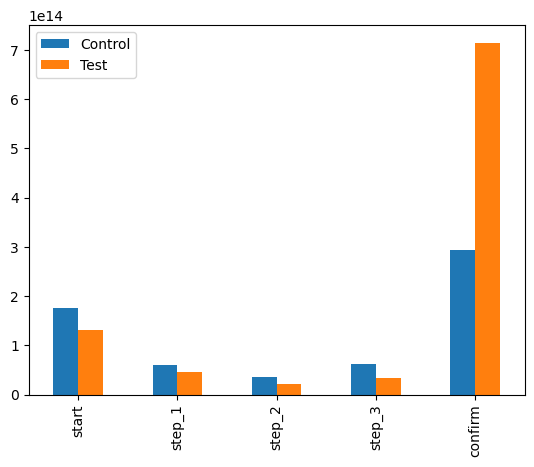

In [31]:
steps_df_test = pd.DataFrame(list_with_steps_test)
steps_df_test = steps_df_test.mean().to_frame()
steps_df_control = pd.DataFrame(list_with_steps_control)
steps_df_control = steps_df_control.mean().to_frame()

combined_steps_means = pd.concat([steps_df_control,steps_df_test], axis=1)
combined_steps_means.columns = ["Control", "Test"]
combined_steps_means.plot(kind="bar")

In [32]:
# combined_steps_means.to_excel("combined_steps.xlsx")
combined_steps_means

,Control,Test
start,2 days 00:57:48.402349432,1 days 12:19:55.929903120
step_1,0 days 16:46:45.853057161,0 days 12:29:42.024313791
step_2,0 days 09:57:46.994791020,0 days 06:01:23.604812151
step_3,0 days 17:28:24.493149344,0 days 09:31:58.609181921
confirm,3 days 09:28:51.335925349,8 days 06:32:30.660205245


In [33]:
# all_data.to_excel("all_data.xlsx")
customer_nan = {}
list_with_steps_nan = []
nan_list = all_data[all_data["Variation"].isna()]["client_id"].unique()

In [80]:
count_user = 0
for user in nan_list:
    try:
        time_extract(user, list_with_steps_nan)
        steps_df_nan = pd.DataFrame(list_with_steps_nan)
        steps_df_nan = steps_df_nan.mean().to_frame()
        list_with_steps_nan.clear()
    
        var_test = steps_df_nan - steps_df_test
        var_control = steps_df_nan - steps_df_control
        # print(user, steps_df_nan, var_test, var_control)
        # print(var_test.mean()[0], var_control.mean()[0])
    except:
        count_user += 1
        # print(user, " - Failed: ", count_user)

    if var_test.mean()[0] < var_control.mean()[0]:
        customer_nan[user] = "Control"
    else:
        customer_nan[user] = "Test"

In [63]:
combined_steps_means

,Control,Test
start,2 days 00:57:48.402349432,1 days 12:19:55.929903120
step_1,0 days 16:46:45.853057161,0 days 12:29:42.024313791
step_2,0 days 09:57:46.994791020,0 days 06:01:23.604812151
step_3,0 days 17:28:24.493149344,0 days 09:31:58.609181921
confirm,3 days 09:28:51.335925349,8 days 06:32:30.660205245


In [35]:
all_data.head(3)

,client_id,visitor_id,visit_id,process_step,date_time,client_years,client_month,client_age,gender,num_accounts,balance,calls_6_months,logins_6,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5,64,79,U,2,189023.86,1,4,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5,64,79,U,2,189023.86,1,4,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5,64,79,U,2,189023.86,1,4,Test


In [55]:
nans = pd.DataFrame(customer_nan, [0]).T

In [56]:
filled = all_data.merge(nans, left_on="client_id", right_on=nans.index)
filled["Variation"].fillna(filled[0], inplace=True)

In [57]:
filled.drop(columns=[0], inplace=True)

In [39]:
# filled.to_excel("filled.xlsx")

In [59]:
filled["Variation"].value_counts()

Variation
Control    117744
Test        10778
Name: count, dtype: int64

In [70]:
all_data[(all_data["Variation"].isna())&(all_data["client_id"]==7775828)].sort_values(by="date_time")

,client_id,visitor_id,visit_id,process_step,date_time,client_years,client_month,client_age,gender,num_accounts,balance,calls_6_months,logins_6,Variation
261846,7775828,995150070_44942900577,669119128_68248839401_799567,start,2017-03-30 01:28:10,15,191,31,F,2,22226.56,2,2,NaN
261845,7775828,995150070_44942900577,669119128_68248839401_799567,step_1,2017-03-30 01:28:18,15,191,31,F,2,22226.56,2,2,NaN
261844,7775828,995150070_44942900577,669119128_68248839401_799567,step_2,2017-03-30 01:29:21,15,191,31,F,2,22226.56,2,2,NaN
261843,7775828,995150070_44942900577,669119128_68248839401_799567,step_3,2017-03-30 01:30:18,15,191,31,F,2,22226.56,2,2,NaN
261842,7775828,995150070_44942900577,669119128_68248839401_799567,confirm,2017-03-30 01:31:25,15,191,31,F,2,22226.56,2,2,NaN


In [129]:
st.ttest_ind(all_data[(all_data["Variation"]=="Test")]["client_age"],
             all_data[(all_data["Variation"]=="Control")]["client_age"],
            alternative="greater",
            equal_var=False)

TtestResult(statistic=8.453185128864886, pvalue=1.4233716907899267e-17, df=307293.23569923895)

In [105]:
all_data.groupby(["Variation"])["calls_6_months"].mean()

Variation
Control    3.275794
Test       3.205323
Name: calls_6_months, dtype: float64

In [103]:
all_data.groupby(["Variation"])["logins_6"].mean()

Variation
Control    6.311295
Test       6.245188
Name: logins_6, dtype: float64

In [106]:
all_data.groupby(["Variation"])["client_age"].mean()

Variation
Control    48.582280
Test       49.051049
Name: client_age, dtype: float64

In [110]:
all_data.groupby(["gender"])["logins_6"].mean()

gender
F    5.436851
M    6.043713
U    5.637981
Name: logins_6, dtype: float64

In [158]:
new_steps = all_data.groupby(["client_id"])["process_step"].count()

container_test = []
container_control = []

In [160]:
for u,i in new_steps.items():
    if u in customer_list_test:
        container_test.append(i)
    elif u in customer_list_control:
        container_control.append(i)

In [161]:
test_avg_steps = sum(container_test)/len(container_test)
control_avg_steps = sum(container_control)/len(container_control)

print(f"Test Steps: {test_avg_steps}\nControl Steps: {control_avg_steps}")

Test Steps: 7.270942589014629
Control Steps: 6.618821243298576
